In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit

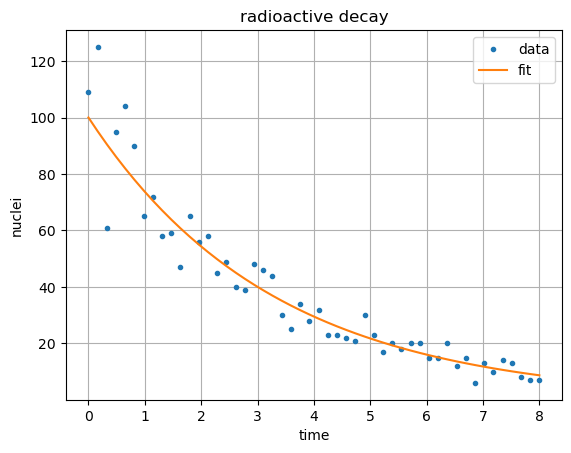

lambda= 0.31 ± 0.01


In [2]:
# exercise 0
def f(y, t, lam):
    return -lam*y

y0=100

def func(t, lam):
    y_odeint=odeint(f,y0,t, args=(lam,))
    return y_odeint[:,0]

data=np.loadtxt('https://raw.githubusercontent.com/PX2134/data/master/week8/ex0.txt')
time=data[:,0]
y_data=data[:,1]

lam_guess=1

popt, pcov= curve_fit(func, time, y_data, p0=[lam_guess])
lam_fit=popt[0]
lam_err=np.sqrt(pcov[0,0])

plt.plot(time, y_data, '.', label='data')
plt.plot(time, func(time, lam_fit), label='fit')
plt.xlabel('time')
plt.ylabel('nuclei')
plt.title('radioactive decay')
plt.legend()
plt.grid()
plt.show();

print('lambda= {:.2f} ± {:.2f}'.format(lam_fit, lam_err))

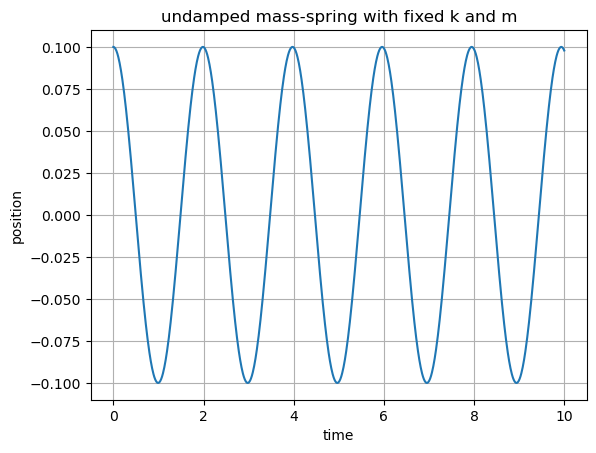

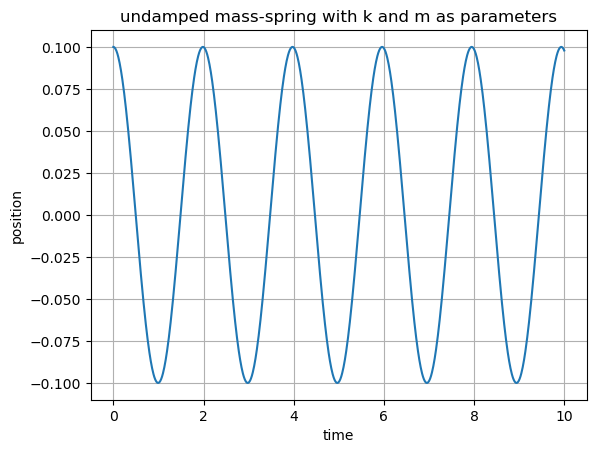

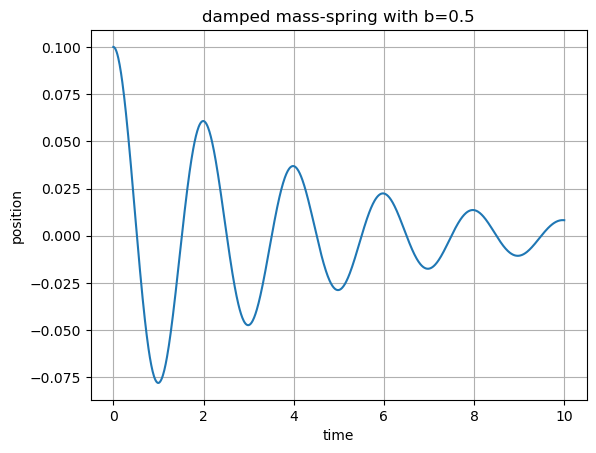

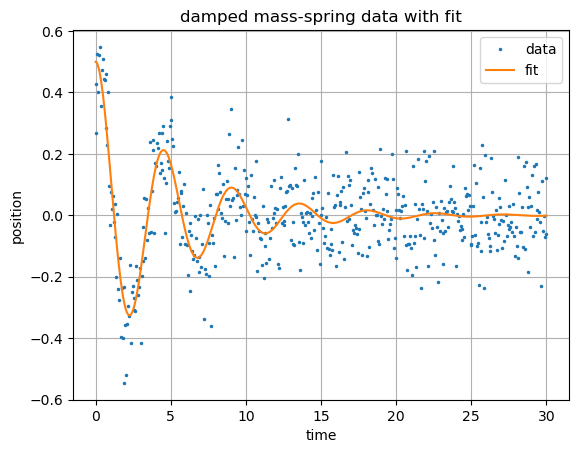

k= 0.20 ± 0.00
b= 0.04 ± 0.00


In [3]:
# exercise 1

# 1: undamped mass-spring with fixed k and m

# derivative func. y[0] is position y[1] is velocity
def f_undamped(y,t):
    k=10
    m=1
    return [y[1], -(k/m)*y[0]]
    
# time array, 1000 evenly spaced points from 0 to 10
t=np.linspace(0,10,1000)

# initial conditions y(0)=0.1m and v(0)=0
yinit=[0.1, 0]

y1=odeint(f_undamped, yinit, t)

plt.plot(t, y1[:,0])
plt.xlabel('time')
plt.ylabel('position')
plt.title('undamped mass-spring with fixed k and m')
plt.grid()
plt.show();


# 2: undamped with k and m as parameters

def f_undamped_params(y, t, k, m):
    return [y[1], -(k/m)*y[0]]

k=10
m=1

y2=odeint(f_undamped_params, yinit, t, args=(k,m))

plt.plot(t, y2[:,0])
plt.xlabel('time')
plt.ylabel('position')
plt.title('undamped mass-spring with k and m as parameters')
plt.grid()
plt.show();


# 3: damped mass-spring with k,m,b

def f_damped(y, t, k, m, b):
    return [y[1], -(k/m)*y[0] - (b/m)*y[1]]

k=10
m=1
b=0.5

y3=odeint(f_damped, yinit, t, args=(k,m,b))

plt.plot(t, y3[:,0])
plt.xlabel('time')
plt.ylabel('position')
plt.title('damped mass-spring with b=0.5')
plt.grid()
plt.show();


# 4: fit k and b from noisy data

# noisy data
data4=np.loadtxt('https://raw.githubusercontent.com/PX2134/data/master/week8/spring_measurement.txt')
t_data4=data4[:,0]
y_data4=data4[:,1]

# experiment setup
m_fixed=0.1 #(kg)
y0=0.5 #init. position (m)
v0=0 #released from rest

# model func. for curvefit
def spring_model(t, k, b):
    yinit_fit=[y0,v0]
    y4=odeint(f_damped, yinit_fit, t, args=(k, m_fixed, b))
    return y4[:,0] # only positions

# initial guesses for k and b
k_guess=10
b_guess=0.5

popt, pcov= curve_fit(spring_model, t_data4, y_data4, p0=[k_guess, b_guess])

k_fit, b_fit= popt
k_err, b_err= np.sqrt(np.diagonal(pcov))

# plot data and fit
plt.plot(t_data4, y_data4, '.', ms=3, label='data')
plt.plot(t_data4, spring_model(t_data4, k_fit, b_fit), ms=6, label='fit')
plt.xlabel('time')
plt.ylabel('position')
plt.title('damped mass-spring data with fit')
plt.legend()
plt.grid()
plt.show();

print('k= {:.2f} ± {:.2f}'.format(k_fit, k_err))
print('b= {:.2f} ± {:.2f}'.format(b_fit, b_err))

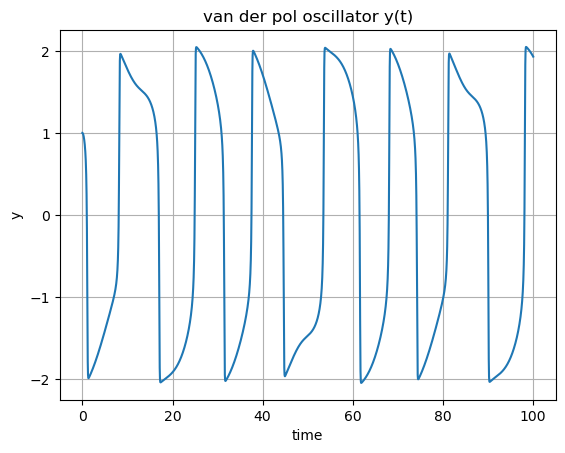

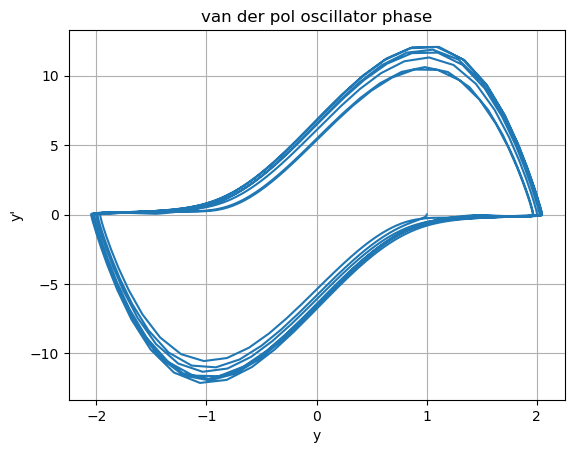

In [4]:
# exercise 2

# derivative func. for van der pol
# y[0]=y y[1]=dy/dt=y'
def vdp(y, t, m, A, omega):
    return [y[1], # dy/dt
           m*(1-y[0]**2)*y[1]-y[0] + A*np.sin(omega*t)] #dy'/dt

m=8
A=1
omega=0.6

#time array
t=np.linspace(0,100,5000)

#init conditions y(0), y'(0)
y_init=[1, 0]

y=odeint(vdp, y_init, t, args=(m, A, omega))

# y(t) is column 0 and y'(t) is column 1
y_t=y[:,0]
yprime_t=y[:,1]

# plot y vs t
plt.plot(t, y_t)
plt.xlabel('time')
plt.ylabel('y')
plt.title('van der pol oscillator y(t)')
plt.grid()
plt.show();

# plot y' vs y
plt.plot(y_t, yprime_t)
plt.xlabel('y')
plt.ylabel("y'")
plt.title('van der pol oscillator phase')
plt.grid()
plt.show();